Chúc các bạn làm bài tốt!

# Load thư viện

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [72]:
import numpy as np

class LinearRegression:
    
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) # add bias term
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1) # add bias term
        return X @ self.coefficients


# 2a: Fit dữ liệu trong file linear.csv và visualize

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
clf = LinearRegression()
data = pd.read_csv('/content/drive/MyDrive/Python/AI4U_ML/Bản sao của linear.csv',sep = ',')
data.columns = ['Area', 'Price']
data.head()

Area    Price
0  30.0000  448.524
1  32.4138  509.248
2  34.8276  535.104
3  37.2414  551.432
4  39.6552  623.418

In [75]:
x = data.Area.values.reshape(-1,1)
y = data.Price.values.reshape(-1,1)
clf.fit(x,y)
y_pred = clf.predict(x)

Text(0, 0.5, 'Price')

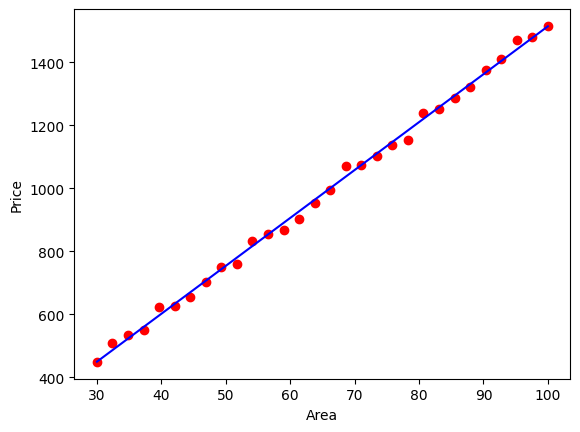

In [76]:
plt.scatter(x,y,color = 'r')
plt.plot(x,y_pred,color='b')
plt.xlabel('Area')
plt.ylabel('Price')

# 2b: Tính loss Root Mean Squared Error - RMSE

In [77]:
def rmse(y,y_pred):
  mse = np.mean((y-y_pred)**2)
  rmse = np.sqrt(mse)
  return rmse

# 3a: Fit dữ liệu trong file nonLinear.csv 

In [78]:
data = pd.read_csv('/content/drive/MyDrive/Python/AI4U_ML/Bản sao của nonLinear.csv',sep = ',')
data.columns = ['Area', 'Price']
data.head()

Area    Price
0  30.0000 -100.000
1  32.4138 -190.725
2  34.8276 -269.798
3  37.2414 -337.218
4  39.6552 -392.985

# 3b: Visualize kết quả

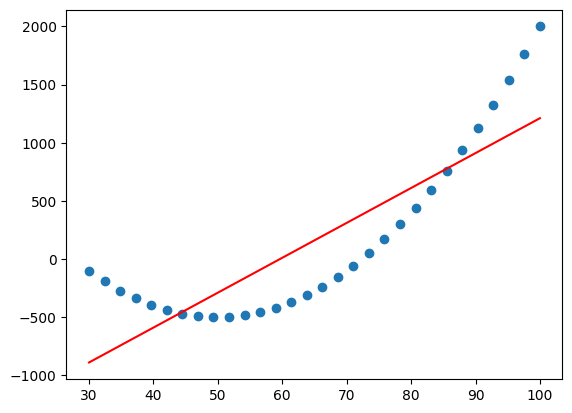

In [79]:
x = data.Area.values.reshape(-1,1)
y = data.Price.values.reshape(-1,1)
clf.fit(x,y)
y_pred = clf.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')

# 3c: Nhận xét

Kết quả predict ko fit với y real, do bộ data đang là hàm bậc 2 còn y pred đang là bậc 1

# 4: Cải thiện model

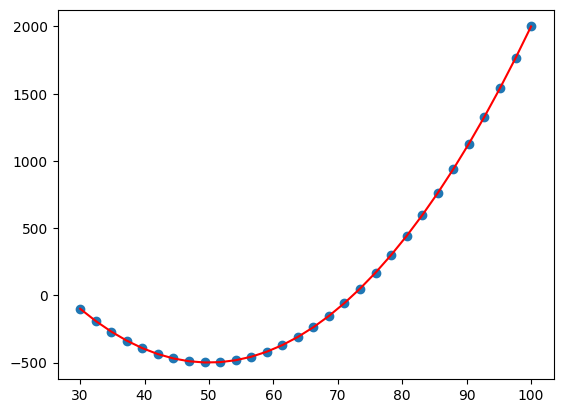

In [80]:
x1 = np.array(data.Area).reshape(-1,1)
x2 = np.array(data.Area**2).reshape(-1,1)
x0 = np.concatenate((x1,x2),axis =1)
clf.fit(x0,y)
y_pred = clf.predict(x0)
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')

# 5: Thử nghiệm với dữ liệu sample.csv

In [81]:
df = pd.read_csv('/content/drive/MyDrive/Python/AI4U_ML/Bản sao của sample.csv',sep =',')
df.head()
df.columns = ['STT','F','FN','Kg','A','FS','P']
df.head()

STT     F     FN         Kg        A        FS           P
0    0  25.3  0.934  52.163126  3508.44 -3.265217  115.918058
1    1  29.3  0.888  61.801964  2773.54  0.734783  137.337699
2    2  37.7  0.933  93.440034  1738.97  9.134783  207.644521
3    3  32.8  0.757  59.874197  1665.29  4.234783  133.053771
4    4  24.6  1.031  50.348756  3982.95 -3.965217  111.886125

In [82]:
x = df[['F','FN','A','FS','P']].values
y = df.Kg.values
clf.fit(x,y)
y_pred = clf.predict(x)
print(rmse(y,y_pred))


324.15752108926165
